In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [4]:
print(df.shape)
df.head()

(15, 2)


,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


#### Checking Data Types and Checking There is Any Null Data in Give Data Set

In [9]:
df.dtypes
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

#### Droping The Duplicates

In [10]:
df = df.drop_duplicates()

# Exploratory Data Analysis

<AxesSubplot:xlabel='Chirps/Second'>

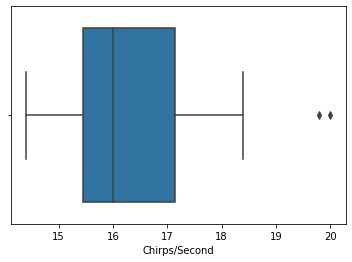

In [11]:
import seaborn as sns
sns.boxplot(x = df["Chirps/Second"])

<AxesSubplot:xlabel='Ground Temperature'>

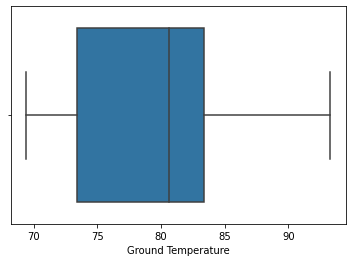

In [12]:
sns.boxplot(x = df["Ground Temperature"])

In [13]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


# Finding of Interquartile Range And Lower Limit And Upper Limit Method

In [14]:
def outlier_presence(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print("Interquartile Range of " + i + " is", IQR)
    print("Lower Limit ", lower_limit)
    print("Upper Limit ", upper_limit)
    outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)]
    if outliers.shape[0] != 0:
      print("Outlier is Presented In",i )
      print("\n")
    else:
      print("Outlier is Not Presented In",i )
      print("\n")
  
outlier_presence(df)

Interquartile Range of Chirps/Second is 1.6999999999999993
Lower Limit  12.9
Upper Limit  19.699999999999996
Outlier is Presented In Chirps/Second


Interquartile Range of Ground Temperature is 10.0
Lower Limit  58.400000000000006
Upper Limit  98.4
Outlier is Not Presented In Ground Temperature




# From Above Box Plot And Finding of Interquartile Range We Can Know Outliers Present In Chirps/Second
## To Known Outlier Data Points In Our Feature And Target Variable

In [16]:
def Outlier_Data_Points(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)]
    if outliers.empty: 
      print("No Outlier is Presented In",i )
    else:
      print("Outlier is Presented In " + i + "is")
      for j in outliers[i]:
        print(j)
      print("\n")
Outlier_Data_Points(df)

Outlier is Presented In Chirps/Secondis
20.0
19.8


No Outlier is Presented In Ground Temperature


# Here Only Two Outliers Presented, Thats Not Affect Our Model, So We Can Procced Further
## Finding The Relationship Between The Chirps/Second And Ground Temperature

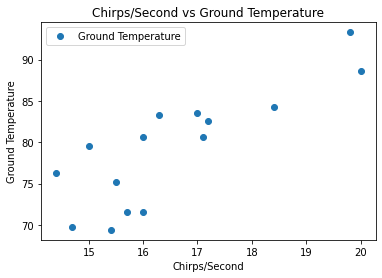

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [17]:
df.plot(x='Chirps/Second', y='Ground Temperature', style='o')
plt.title('Chirps/Second vs Ground Temperature')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.show()

df.corr()

### From Scatter Plot And Correlation Values We Can Find That There Is Good Linear Relation Between Chirps/Second and Ground Temperature, So We Can Develop Linear Regression Model
### In This Data Set Less Number Of Data Presents So No Need To Split The Data, We Can Use it Directly 

In [19]:
X = df.loc[:, ['Ground Temperature']].values 
y = df.loc[:, 'Chirps/Second'].values 

# Task 1
### 1. Find the linear regression equation for this data.
### Answer is Y = X*M + C
### Y is Our Target Variable, X Is Our Feature , M&C Are The Model Parameters, M is the Slope, C is Intercept

In [20]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()   
regressor.fit(X, y)

LinearRegression()

In [21]:
y_pred = regressor.predict(X) 
y_pred

array([18.44509085, 14.99409541, 19.39918959, 17.572192  , 16.821093  ,
       15.72489445, 14.60839592, 14.99409541, 14.547496  , 17.36919227,
       16.61809327, 17.22709246, 16.821093  , 17.40979222, 15.94819415])

In [22]:
New_df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
New_df

,Actual,Predicted
0,20.0,18.445091
1,16.0,14.994095
2,19.8,19.399190
3,18.4,17.572192
4,17.1,16.821093
5,15.5,15.724894
6,14.7,14.608396
7,15.7,14.994095
8,15.4,14.547496
9,16.3,17.369192


In [23]:
print(regressor.intercept_) # c
print(regressor.coef_) # slope - m

0.4593146452359562
[0.20299973]


# Let Consider X = 15

In [25]:
M = regressor.coef_
C = regressor.intercept_
Y = M*(15)+C
print(Y)

[3.50431062]


# 2. Chart the original data and the equation on the chart.

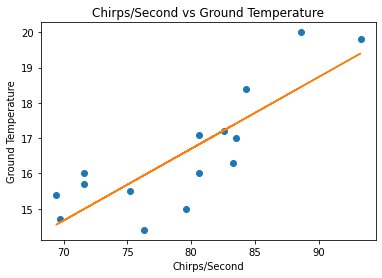

In [26]:
y_pred = regressor.predict(X) 
plt.plot(X, y, 'o')
plt.title('Chirps/Second vs Ground Temperature')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.plot(X, y_pred)

# 3. Find the equation's  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [27]:
from sklearn import metrics
y_pred = regressor.predict(X) 
print('R2- SCORE:', metrics.r2_score(y,y_pred))

R2- SCORE: 0.6922946529147


#### The R2 Score Value Of This Model is 0.69 it's Lower Than 0.8

# 4. Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [28]:
groundTemp = 95
M = regressor.coef_
C = regressor.intercept_
cricChirping = M*(groundTemp)+C
print(cricChirping)

[19.74428913]


#### When Ground Temprature is 95 Then The Approximate Chirping is 19

# 5. Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [29]:
X = df.loc[:, ['Chirps/Second']].values 
y = df.loc[:, 'Ground Temperature'].values 

from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()   
regressor.fit(X, y)

y_pred = regressor.predict(X) 
y_pred

array([91.0554423, 77.4141503, 90.3733777, 85.5989255, 81.1655056,
       75.7089888, 72.9807304, 76.3910534, 75.3679565, 78.4372472,
       74.0038273, 81.5065379, 77.4141503, 80.8244733, 71.9576335])

In [30]:
cricChirping = 18
M = regressor.coef_
C = regressor.intercept_
groundTemp = M*(cricChirping)+C
print(groundTemp)

[84.2347963]


#### When Chirping is 18 Then The Approximate Ground Temprature is 84.2

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [31]:
df = pd.read_fwf("brain_body.txt")

In [32]:
print(df.shape)
df.head()

(62, 2)


,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


# Checking Data Types

In [33]:
df.dtypes

Brain    float64
Body     float64
dtype: object

In [34]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

# Droping The Duplicates

In [35]:
df = df.drop_duplicates()

# Finding Ouliers in Given Data Set By Two Way

<AxesSubplot:xlabel='Brain'>

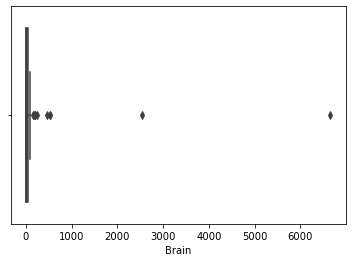

In [36]:
import seaborn as sns
sns.boxplot(x = df["Brain"])

<AxesSubplot:xlabel='Body'>

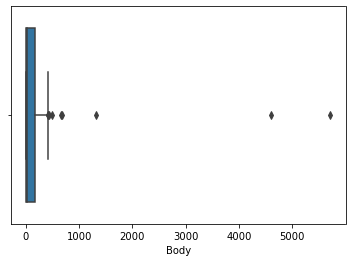

In [37]:
sns.boxplot(x = df["Body"])

# IQR Method

In [38]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


# Finding of Interquartile Range And Lower Limit And Upper Limit Method


In [39]:
def outlierPresence(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print("Interquartile Range of " + i + " is", IQR)
    print("Lower Limit ", lower_limit)
    print("Upper Limit ", upper_limit)
    outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)]
    if outliers.shape[0] != 0:
      print("Outlier is Presented In",i )
      print("\n")
    else:
      print("Outlier is Not Presented In",i )
      print("\n")
  
outlierPresence(df)

Interquartile Range of Brain is 47.6025
Lower Limit  -70.80375000000001
Upper Limit  119.60625
Outlier is Presented In Brain


Interquartile Range of Body is 161.75
Lower Limit  -238.375
Upper Limit  408.625
Outlier is Presented In Body




# From Above Box Plot And Finding of Interquartile Range We Can Know That Outliers Present In Both Brain And Body


In [40]:
def OutDP(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)]
    if outliers.empty: 
      print("No Outlier is Presented In",i )
    else:
      print("Outlier is Presented In " + i + "is")
      for j in outliers[i]:
        print(j)
      print("\n")
OutDP(df)

Outlier is Presented In Brainis
465.0
2547.0
187.1
521.0
529.0
207.0
6654.0
250.0
192.0
160.0


Outlier is Presented In Bodyis
423.0
4603.0
419.0
655.0
680.0
1320.0
5712.0
490.0
440.0




In [41]:
df_cap = df.copy()

# Capping Outliers using the IQR method

In [42]:
def CapOut(df_cap):
  for i in df_cap.keys():
    Q1 = df_cap[i].quantile(0.25)
    Q3 = df_cap[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    df_cap[i] = np.where(df_cap[i]<lower_limit, lower_limit, np.where(df_cap[i]>upper_limit, upper_limit, df_cap[i])) # Here We Replace The All outliers with whiskers(lower_limit and upper_limit)
    print("Outliers in " + i + " Are Capped Using Capping Method")
  return df_cap
df_cap = CapOut(df_cap)

Outliers in Brain Are Capped Using Capping Method
Outliers in Body Are Capped Using Capping Method


# Again Checking Outlier Present Are Not in Data Set

In [43]:
outlierPresence(df_cap)

Interquartile Range of Brain is 47.6025
Lower Limit  -70.80375000000001
Upper Limit  119.60625
Outlier is Not Presented In Brain


Interquartile Range of Body is 161.75
Lower Limit  -238.375
Upper Limit  408.625
Outlier is Not Presented In Body




### Now Successfully Outliers Are capped using capping Method

# Finding The Relationship Between The Brain And Body

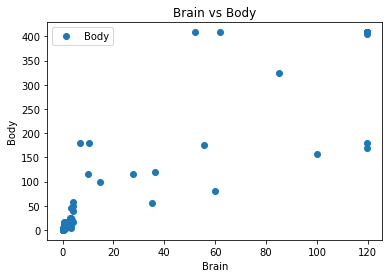

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [44]:
df_cap.plot(x='Brain', y='Body', style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

df.corr()

#### From Scatter Plot And Correlation Values We Can Find That There Is Good Linear Relation Between Brain and Body, So We Can Develop Linear Regression Model

# Splitting Of Data Set

In [46]:
from sklearn.model_selection import train_test_split
X = df_cap.loc[:, ['Brain']].values 
y = df_cap.loc[:, 'Body'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)

# Task 1
## 1. Find the linear regression equation for this data for brain weight to body weight.
### Answer is Y = X*M + C

In [47]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()   
regressor.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = regressor.predict(X_test) 
y_pred

array([ 33.55226323,  28.00061343, 114.89038813, 333.35749068,
       184.60878091, 333.35749068, 243.9985229 ,  26.45131582,
        34.97245271,  24.52760461, 282.73096333, 333.35749068,
        28.90437038, 333.35749068,  33.8104795 ,  24.82971764,
        24.77549223, 333.35749068,  27.09685649])

In [49]:
New_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
New_df

,Actual,Predicted
0,10.800,33.552263
1,8.100,28.000613
2,56.000,114.890388
3,408.625,333.357491
4,408.625,184.608781
5,408.625,333.357491
6,325.000,243.998523
7,12.300,26.451316
8,17.000,34.972453
9,0.140,24.527605


In [50]:
print(regressor.intercept_) # c
print(regressor.coef_) # slope - m

24.514693794693166
[2.5821627]


# 2. Chart the original data and the equation on the chart.

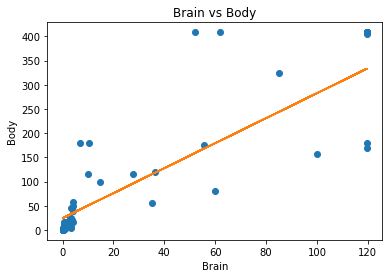

In [51]:
y_pred = regressor.predict(X) 
plt.plot(X, y, 'o')
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.plot(X, y_pred)

# 3. Find the equation's  score (use the .score method) to determine whether the equation is a good fit for this data.
### (0.8 and greater is considered a strong correlation.)

In [52]:
from sklearn import metrics
y_pred = regressor.predict(X_test) 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.8299815065706626


#### The R2 Score Value Of This Model is 0.8 it's Lower Than 0.8

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [54]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

# Checking Data Types

In [55]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [56]:
print(df.shape)
df.head()

(52, 6)


,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


# Checking There is Any Null Data in Give Data Set

In [57]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

# Droping The Duplicates

In [58]:
df = df.drop_duplicates()

# There is No Duplicate Datas In Given Data Set, Now We Can Move Forward to Exploratory Data Analysis

# Exploratory Data Analysis
## Finding Ouliers in Given Data Set
### Box Plot Method

<AxesSubplot:xlabel='Sex'>

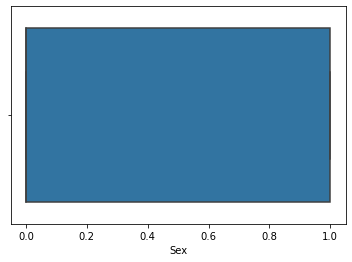

In [59]:
import seaborn as sns
sns.boxplot(x = df["Sex"])

<AxesSubplot:xlabel='Rank'>

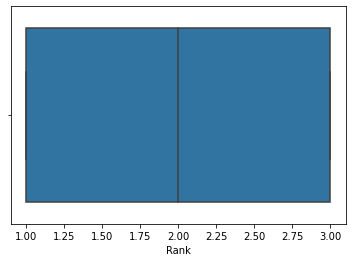

In [60]:
sns.boxplot(x = df["Rank"])

<AxesSubplot:xlabel='Year'>

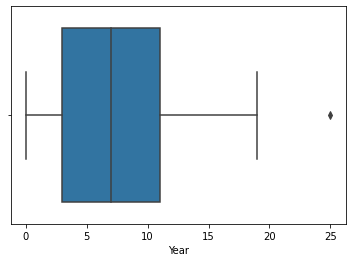

In [61]:
sns.boxplot(x = df["Year"])

<AxesSubplot:xlabel='Degree'>

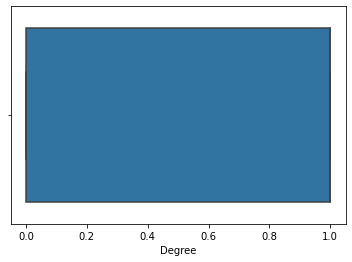

In [62]:
sns.boxplot(x = df["Degree"])

<AxesSubplot:xlabel='YSdeg'>

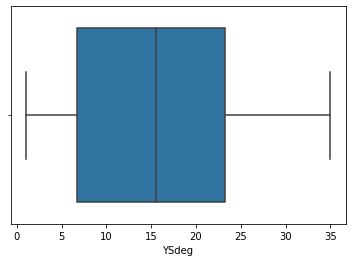

In [63]:
sns.boxplot(x = df["YSdeg"])

<AxesSubplot:xlabel='Salary'>

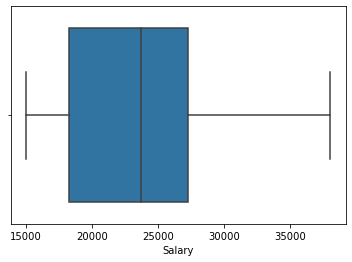

In [64]:
sns.boxplot(x = df["Salary"])

# IQR Method

In [65]:

df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


# Finding of Interquartile Range And Lower Limit And Upper Limit Method


In [66]:
def outlierPresence(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print("Interquartile Range of " + i + " is", IQR)
    print("Lower Limit ", lower_limit)
    print("Upper Limit ", upper_limit)
    outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)]
    if outliers.shape[0] != 0:
      print("Outlier is Presented In",i )
      print("\n")
    else:
      print("Outlier is Not Presented In",i )
      print("\n")
  
outlierPresence(df)

Interquartile Range of Sex is 1.0
Lower Limit  -1.5
Upper Limit  2.5
Outlier is Not Presented In Sex


Interquartile Range of Rank is 2.0
Lower Limit  -2.0
Upper Limit  6.0
Outlier is Not Presented In Rank


Interquartile Range of Year is 8.0
Lower Limit  -9.0
Upper Limit  23.0
Outlier is Presented In Year


Interquartile Range of Degree is 1.0
Lower Limit  -1.5
Upper Limit  2.5
Outlier is Not Presented In Degree


Interquartile Range of YSdeg is 16.5
Lower Limit  -18.0
Upper Limit  48.0
Outlier is Not Presented In YSdeg


Interquartile Range of Salary is 9011.75
Lower Limit  4729.125
Upper Limit  40776.125
Outlier is Not Presented In Salary




# From Above Box Plot And Finding of Interquartile Range We Can Know Outliers Present In Year
## To Known Outlier Data Points In Our Feature And Target

In [67]:
def OutDP(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)]
    if outliers.empty: 
      print("No Outlier is Presented In",i )
    else:
      print("Outlier is Presented In " + i + "is")
      for j in outliers[i]:
        print(j)
      print("\n")
OutDP(df)

No Outlier is Presented In Sex
No Outlier is Presented In Rank
Outlier is Presented In Yearis
25


No Outlier is Presented In Degree
No Outlier is Presented In YSdeg
No Outlier is Presented In Salary


# Here Only One Outliers Presented In Year, Thats Not Affect Our Model

# Finding The Relationship Between ("Sex", "Rank", "Year", "Degree", "YSdeg") To "Salary"

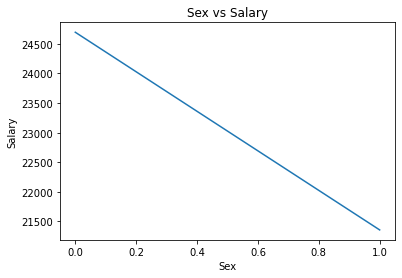

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [68]:
df.groupby('Sex')['Salary'].mean().plot()
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

df[['Sex', 'Salary']].corr()

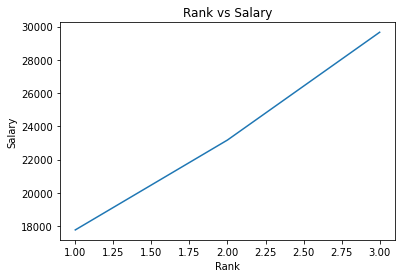

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [69]:
#df.plot(x = 'Rank', y='Salary', style = 'o')
df.groupby('Rank')['Salary'].mean().plot()
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()

df[['Rank', 'Salary']].corr()

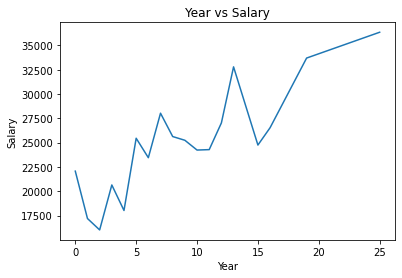

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [70]:
df.groupby('Year')['Salary'].mean().plot()
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

df[['Year', 'Salary']].corr()

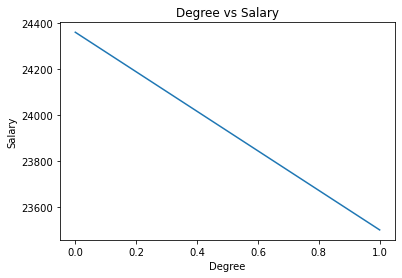

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [71]:
df.groupby('Degree')['Salary'].mean().plot()
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

df[['Degree', 'Salary']].corr()

##### From Plotting Degree Vs Salary We Can Find Straight Line Relationship But Correlation Value Shows Tha There is No Linear Relationship. We can Consider The Degree As One of Our Feature in Our Model

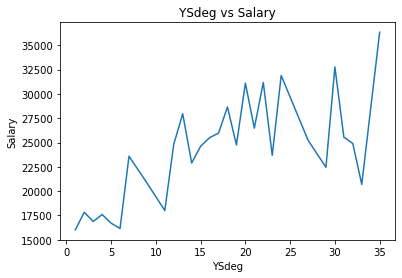

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [72]:
df.groupby('YSdeg')['Salary'].mean().plot()
plt.title('YSdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()

df[['YSdeg', 'Salary']].corr()

##### From Above Observation We Can Consider ("Sex", "Rank", "Year", "Degree", "YSdeg") Feature to Develop Our Model

# 1. Find the linear regression equation for this data using columns 1-5 to column 6.
### For This Data Set Linear Regression Equation is y = B0  + x1B1 + x2B2

##### Spliting The Data Set

In [73]:
from sklearn.model_selection import train_test_split
X = df.loc[:, ["Sex", "Rank", "Year", "Degree", "YSdeg"]].values 
y = df.loc[:, 'Salary'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)

##### Scaling The Data Set

In [74]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

##### Developing The Model


In [75]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()   
regressor.fit(X_train_scaled, y_train)

y_pred = regressor.predict(X_test_scaled) 
y_pred

array([28887.02952781, 29426.57400482, 23074.53644172, 28540.36845393,
       25457.22218901, 21555.98100223, 18962.5998726 , 21372.19690045,
       29866.04049028, 30373.83764927, 16107.69878742, 22869.45858675,
       16429.97095763, 26138.34988493, 15599.90162843, 18976.31516693])

In [76]:
New_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
New_df

,Actual,Predicted
0,27959,28887.029528
1,25500,29426.574005
2,22450,23074.536442
3,29342,28540.368454
4,22906,25457.222189
5,23725,21555.981002
6,23713,18962.599873
7,21600,21372.196900
8,27025,29866.040490
9,35350,30373.837649


In [77]:
df_coff = pd.DataFrame(regressor.coef_ , ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'], columns= ['Cofficient'])
df_coff

,Cofficient
Sex,929.457566
Rank,5310.095498
Year,3112.935207
Degree,-715.662197
YSdeg,-1907.195112


In [78]:
print(regressor.intercept_)

23947.555555555555


In [79]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7801347152885463


# 2. Find the selection of columns with the best R2 score.

In [80]:

def Selc_Col(df):
  for i in df.keys():
    if i != 'Salary':
      X = df.loc[:, [i]].values 
      y = df.loc[:, 'Salary'].values 
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)
      scaler = StandardScaler() 
      scaler.fit(X_train,y_train) 
      X_train_scaled = scaler.transform(X_train) 
      X_test_scaled = scaler.transform(X_test) 
      regressor = LinearRegression()   
      regressor.fit(X_train_scaled, y_train)
      y_pred = regressor.predict(X_test_scaled) 
      print('R2- SCORE of ' + i + ' is: ', metrics.r2_score(y_test,y_pred))

In [81]:
Selc_Col(df)

R2- SCORE of Sex is:  -0.012233465811496869
R2- SCORE of Rank is:  0.6723218219021224
R2- SCORE of Year is:  0.39359646731694975
R2- SCORE of Degree is:  -0.05577210942642963
R2- SCORE of YSdeg is:  0.3561736731232156


##### From Above  Score Observation Rank Feature Have High Score. From Cofficient Value And  Score Rank Have High Impact in Salary Prediction

# 3. Report whether sex is a factor in salary.
#### Here Sex Is Not a Factor for Salary Prediction Because It Have Low Cofficient Value And Low R2 Score